#### Data Wrangling :WeRateDogs twitter Data 

Data Gathering 

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import tweepy
import requests
import re
import json
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns 
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#read twitter archive file into dataframe 
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#download and save image-predictions data programatically using requests library       
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
# GET the file name programmatically
file_name = 'image-predictions.tsv'
# Write the file with the context manager with:
with open(file_name, 'wb') as file:
     file.write(response.content)

In [4]:
image = pd.read_csv('image-predictions.tsv',sep='\t')

In [5]:
# Creating a file for the tweets' text data
errors = []
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in archive_df['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print('Error on tweet id {}'.format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)               

In [6]:
#Reading 'tweet_json.txt' file line by line and creating dataframe
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
api = pd.DataFrame(df_list)



Data Assessing

In [7]:

archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Buddy          7
an             7
Bailey         7
Daisy          7
Toby           7
Stanley        6
Oscar          6
Bella          6
Dave           6
Milo           6
Koda           6
Jax            6
Jack           6
Leo            6
Scout          6
Rusty          6
Gus            5
            ... 
Jett           1
Bobbay         1
Robin          1
Dutch          1
Erik           1
Colin          1
Hermione       1
Thor           1
Gerbald        1
Nico           1
Aiden          1
Howie          1
Zoe            1
Mitch          1
Rascal         1
Josep          1
Jersey         1
Laela          1
Karma          1
Bones          1
Griswold       1
Willie         1
DonDon         1
Burt           1
Rodney         1
Tripp          1
Naphaniel      1
Arya          

In [10]:
archive.doggo.value_counts()


None     2259
doggo      97
Name: doggo, dtype: int64

In [11]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [12]:
archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [13]:
archive['rating_numerator'].describe()              

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [14]:
archive['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [15]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
pd.set_option('display.max_colwidth', -1)
archive[archive['rating_numerator'] > 15 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None


In [18]:
pd.set_option('display.max_colwidth', -1)
archive[archive['rating_numerator'] < 6]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3,10,Wesley,None,None,None,None
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4,10,Fido,None,None,None,None
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066325864448/photo/1,4,10,None,None,None,None,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,None,doggo,None,pupper,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,Non

In [19]:
#Find all denominators that are not equal to 10 
archive[archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [20]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
api.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


In [24]:
api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [25]:
archive.shape

(2356, 17)

In [26]:
api.shape

(2354, 3)

In [27]:
image.shape

(2075, 12)

In [28]:
#check the duplicated columns in all tables
all_columns = pd.Series(list(archive)+ list(image)+ list(api))
all_columns[all_columns.duplicated()]

17    tweet_id
31    tweet_id
dtype: object



## • Assessment summary
### Quality aspects:
###### archive table
- retweets and replies not requird ('in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 	'retweeted_status_user_id',	'retweeted_status_timestamp')
- some expanded_urls doesn't have pictures 
- missing values in name, doggo,floofer,pupper,puppo
- rating_numerator have values greater than 15 and smaller than 6 and some contain decimals
- rating_demoniator have values not equal 10
- Erroneous datatypes (timestamp, tweet_id)
- weird names in name column
###### image_prediction table
- Erroneous datatypes (tweet_id)
- there're tweets_id not have image 
###### api table 
- Erroneous datatypes (tweet_id)

### tidiness aspects:
- one column for doggo and floffer, pupper and puppo
- columns headers are values not varibale name in image prediction
- Api table isn't an observational unit to have its own table


# clean


In [29]:
archive = archive.copy()
image = image.copy()
api = api.copy()

### Quality






### Erroneous datatypes (timestamp, tweet_id)

##### Define

- change timestamp type from string to date
- change tweet_id type from int to string


##### code

In [30]:
#change timestamp type from string to date
archive['timestamp'] = archive['timestamp'].astype('datetime64')

In [31]:
#change tweet_id type from string to date
archive['tweet_id'] = archive['tweet_id'].astype('str')


##### Test

In [32]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [33]:
archive.timestamp.dt.year


0       2017
1       2017
2       2017
3       2017
4       2017
5       2017
6       2017
7       2017
8       2017
9       2017
10      2017
11      2017
12      2017
13      2017
14      2017
15      2017
16      2017
17      2017
18      2017
19      2017
20      2017
21      2017
22      2017
23      2017
24      2017
25      2017
26      2017
27      2017
28      2017
29      2017
        ... 
2326    2015
2327    2015
2328    2015
2329    2015
2330    2015
2331    2015
2332    2015
2333    2015
2334    2015
2335    2015
2336    2015
2337    2015
2338    2015
2339    2015
2340    2015
2341    2015
2342    2015
2343    2015
2344    2015
2345    2015
2346    2015
2347    2015
2348    2015
2349    2015
2350    2015
2351    2015
2352    2015
2353    2015
2354    2015
2355    2015
Name: timestamp, Length: 2356, dtype: int64

### archive table Some rows haven't picture image

#### Define
- Remove the rows that have no expanded_url entry

#### Code

In [34]:
archive = archive[archive['expanded_urls'].notna()]

#### Test

In [35]:
archive.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: datetime64[ns](

In [36]:
archive.expanded_urls.isnull().sum()


0

### rating_numerator have values greater than 15 and smaller than 6 and some contain decimals 


##### Define

- fixing rating_numerator values that greater than 15 and smaller than 6 by slice their tweets and investigate texts and extract their values from texts


#### Code

In [37]:
# Compiling a regex to capture the decimal as well as whole numbers and testing it on some sample text from the dataframe
num_p = re.compile('(\d+\.?\d?\d?)\/(\d{1,3})')
archive['rating_numerator'] = archive.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')
print(re.findall(num_p, 'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'))
print(re.findall(num_p, 'This is Logan, the Chow who lived. He solemnly swears he''s up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS'))
print(re.findall(num_p, 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'))

[('13.5', '10')]
[('9.75', '10')]
[('11.26', '10')]


In [38]:
archive.rating_denominator.value_counts()

10     2278
11     3   
50     3   
80     2   
7      1   
170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
2      1   
Name: rating_denominator, dtype: int64

In [39]:
#replace unusaul values in numerator
archive.rating_numerator.replace(84, 14, inplace=True)
archive.rating_numerator.replace(24,11, inplace=True)
archive.rating_numerator.replace(165 ,11, inplace=True)
archive.rating_numerator.replace(204 ,12, inplace=True)
archive.rating_numerator.replace(50 ,11, inplace=True)
archive.rating_numerator.replace(99,11, inplace=True)
archive.rating_numerator.replace(80,10, inplace=True)
archive.rating_numerator.replace(45, 9, inplace=True)
archive.rating_numerator.replace(60 ,12, inplace=True)
archive.rating_numerator.replace(44 ,11 ,inplace=True)
archive.rating_numerator.replace(143 ,11 ,inplace=True)
archive.rating_numerator.replace(121 ,11 ,inplace=True)
archive.rating_numerator.replace(144 ,12 ,inplace=True)
archive.rating_numerator.replace(88,11 ,inplace=True)


In [40]:
#replace unusaul values in denominater
archive.rating_denominator.replace(70, 10, inplace=True)
archive.rating_denominator.replace(7, 10, inplace=True)
archive.rating_denominator.replace(150, 10, inplace=True)
archive.rating_denominator.replace(170, 10, inplace=True)
archive.rating_denominator.replace(50, 10, inplace=True)
archive.rating_denominator.replace(90, 10, inplace=True)
archive.rating_denominator.replace(80,10 , inplace= True)
archive.rating_denominator.replace(50,10 , inplace= True)
archive.rating_denominator.replace(50 ,10 , inplace= True)
archive.rating_denominator.replace(40 ,10 , inplace= True)
archive.rating_denominator.replace(130 ,10 , inplace= True)
archive.rating_denominator.replace(110 ,10 , inplace= True)
archive.rating_denominator.replace(120 ,10, inplace= True)
archive.rating_denominator.replace( 80,10 , inplace= True)
archive.rating_denominator.replace( 11,10 , inplace= True)
archive.rating_denominator.replace( 2,10 , inplace= True)
archive.rating_denominator.replace( 20,10 , inplace= True)

In [41]:
#drop outliers values from rating_numerator
archive_clean = archive.drop(archive[archive['rating_numerator'] == 420].index)


In [42]:
#drop outliers values from rating_numerator
archive_clean = archive_clean.drop(archive_clean[archive_clean['rating_numerator'] == 1776].index)

#### Test

In [43]:
#confirm that all unusal values are fixed
archive[archive['rating_numerator']== 75].rating_numerator.value_counts()

Series([], Name: rating_numerator, dtype: int64)

In [44]:
archive[archive['rating_numerator']== 26].rating_numerator.value_counts()

Series([], Name: rating_numerator, dtype: int64)

In [45]:
archive[archive['rating_numerator']== 25].rating_numerator.value_counts()

Series([], Name: rating_numerator, dtype: int64)

In [46]:
archive[archive['rating_numerator'] > 15].rating_numerator.value_counts()

420.0     1
1776.0    1
Name: rating_numerator, dtype: int64

In [47]:
archive[archive['rating_numerator'] < 6].rating_numerator.value_counts()

5.0    34
3.0    19
4.0    16
2.0    9 
1.0    6 
0.0    2 
Name: rating_numerator, dtype: int64

In [48]:
archive[archive.rating_denominator != 10].rating_denominator.value_counts()

Series([], Name: rating_denominator, dtype: int64)

In [49]:
archive.rating_numerator.value_counts()

12.00      550
11.00      463
10.00      456
13.00      339
9.00       157
8.00       102
7.00       53 
14.00      51 
5.00       34 
6.00       32 
3.00       19 
4.00       16 
2.00       9  
1.00       6  
0.00       2  
9.75       2  
15.00      1  
11.26      1  
11.27      1  
13.50      1  
420.00     1  
1776.00    1  
Name: rating_numerator, dtype: int64

In [50]:
archive_clean[archive_clean['rating_numerator'] > 15].rating_numerator.value_counts()

Series([], Name: rating_numerator, dtype: int64)

##### Define

- changing all inconsistent value such as a, an and any name less than 3 letters in name column



##### Code

In [51]:
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_clean.iterrows():  
    try:
        if row['name'] == "a":
            correct_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('a', correct_name)
        elif row['name'] == 'an':
            correct_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('an', correct_name)
        elif len(row['name']) < 3:
            correct_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace( "row['name']" , correct_name)

    except IndexError:
        archive_clean.loc[index,'name'] = np.nan


##### Test

In [52]:
archive_clean.name.value_counts(dropna = False)

None         685
NaN          57 
Charlie      12 
Cooper       11 
Lucy         11 
Oliver       11 
Tucker       10 
Lola         10 
Penny        10 
Winston      9  
the          8  
Sadie        8  
Toby         7  
Buddy        7  
Bailey       7  
Daisy        7  
Rusty        6  
Scout        6  
Oscar        6  
Dave         6  
Jack         6  
Stanley      6  
Milo         6  
Bella        6  
Koda         6  
Leo          6  
Jax          6  
very         5  
Sammy        5  
Sunny        5  
            ..  
Lupe         1  
Stu          1  
Cuddles      1  
Cermet       1  
Fabio        1  
Beemo        1  
Pippin       1  
Tuck         1  
Raphael      1  
Hector       1  
Clybe        1  
William      1  
Jockson      1  
Brian        1  
Creg         1  
Aja          1  
Tobi         1  
Rumpole      1  
Lili         1  
Bruno        1  
Kenzie       1  
Tito         1  
Shnuggles    1  
Peanut       1  
Stephanus    1  
Alfredo      1  
Tino         1  
Willy        1

### image_prediction , Erroneous datatypes (tweet_id)

##### Define
- changing datetype of tweet_id from int to str

#### Code

In [53]:
#change tweet_id type from int to str
image['tweet_id'] = image['tweet_id'].astype('str')

#### Test

In [54]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB



### API table, Erroneous datatypes (tweet_id)

#### Define 
- changing datetype of tweet_id from int to str

#### Code

In [55]:
#change tweet_id type from int to str
api['tweet_id'] = api['tweet_id'].astype('str')

#### Test

In [56]:
api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null object
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


## Tidiness 



##### Define
- combine four dog stages into one column dog_stage and drop doggo,floofer,pupper,puppo columns



#### Code


In [57]:
# assign the last four columns of the archive dataframe to its new value without None
archive_clean.iloc[:, -4:  ] = archive_clean.iloc[:, -4:  ].replace('None','')


In [58]:
(archive_clean.loc[:, "doggo":"puppo"] != '') .sum()


doggo      94 
floofer    10 
pupper     255
puppo      29 
dtype: int64

In [59]:
# Getting all the tweets where the value of both 'doggo' and 'pupper' is not none
nonunique_stage = archive_clean[(archive_clean['doggo'] != '') & (archive_clean['pupper'] != '')]
# Extracting only those the columns of interest and investigate its head
nonunique_stage.iloc[:, -4:].head()

,doggo,floofer,pupper,puppo
460,doggo,,pupper,
531,doggo,,pupper,
565,doggo,,pupper,
575,doggo,,pupper,
705,doggo,,pupper,


In [60]:
#combine 4 dog stages using addition operation
archive_clean['dog_stage'] = archive_clean['doggo']+ archive_clean['floofer']+archive_clean['pupper']+archive_clean['puppo'] 

In [61]:
#replace empty string with np.nan
archive_clean.replace("", np.nan , inplace = True)

In [62]:
#separate the combined stages with a hyphen 
archive_clean[archive_clean["dog_stage"] == "doggopupper"] = "doggo-pupper"
archive_clean[archive_clean["dog_stage"] == "doggofloofer"] = "doggo-floofer"
archive_clean[archive_clean["dog_stage"] == "doggopuppo"] = "doggo-puppo"  


In [63]:
#Drop dogs type cloumns 
archive_clean_3 = archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

#### Test


In [64]:
archive_clean_3.dog_stage.value_counts(dropna=False)


NaN              1921
pupper           243 
doggo            80  
puppo            28  
doggo-pupper     12  
floofer          9   
doggo-floofer    1   
doggo-puppo      1   
Name: dog_stage, dtype: int64

In [65]:
archive_clean_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2295 non-null object
in_reply_to_status_id         36 non-null object
in_reply_to_user_id           36 non-null object
timestamp                     2295 non-null object
source                        2295 non-null object
text                          2295 non-null object
retweeted_status_id           192 non-null object
retweeted_status_user_id      192 non-null object
retweeted_status_timestamp    192 non-null object
expanded_urls                 2295 non-null object
rating_numerator              2295 non-null object
rating_denominator            2295 non-null object
name                          2238 non-null object
dog_stage                     374 non-null object
dtypes: object(14)
memory usage: 348.9+ KB


#### Define
- drop records not have images then drop replies and retweets 
- drop retweets and replies from image table

#### Code

In [66]:
# creating a list of tweet_ids with images "tweets_with_image" 
tweets_with_image = list(image.tweet_id.unique())

In [67]:
# confirming that all the tweets with images exist in the archive dataset
len(tweets_with_image) == archive_clean_3.tweet_id.isin(tweets_with_image).sum()

False

In [68]:
# Cleaning in action 
archive_clean_3 = archive_clean_3[archive_clean_3.tweet_id.isin(tweets_with_image)]

In [69]:
# extract the retweets that include data in the retweet_status_id.
retweet_entries = archive_clean_3.retweeted_status_id.notnull()
archive_clean_3[retweet_entries].shape[0]

79

In [70]:
#Dropping the retweets from the archive data set
archive_clean_3 = archive_clean_3[~retweet_entries]

In [71]:
# Extracting replies entries that include data
replies_entries = archive_clean_3.in_reply_to_status_id.notnull()
archive_clean_3[replies_entries].shape[0]

22

In [72]:
#check image_prediction table for extra tweet ids not in archive table
np.logical_not(image.tweet_id.isin(list(archive_clean_3.tweet_id)))


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055    True 
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Name: tweet_id, Length: 2075, dtype: bool

In [73]:
#drop retweets and replies ids from image_prediction dataframe
image_clean = image[~np.logical_not(image.tweet_id.isin(list(archive_clean_3.tweet_id)))]

#### Test

In [74]:
archive_clean_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      1981 non-null object
in_reply_to_status_id         22 non-null object
in_reply_to_user_id           22 non-null object
timestamp                     1981 non-null object
source                        1981 non-null object
text                          1981 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 1981 non-null object
rating_numerator              1981 non-null object
rating_denominator            1981 non-null object
name                          1928 non-null object
dog_stage                     295 non-null object
dtypes: object(14)
memory usage: 232.1+ KB


In [75]:
image_clean.shape

(1981, 12)

In [76]:
archive_clean_3.shape

(1981, 14)

#### Define
- reshaping image_prediction cloumn using pd.wide_to_long to do that first edit the name of columns in image_prediction table


#### Code

In [77]:
# Renaming the dataset columns
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_clean.columns = cols


In [78]:
# Reshaping the dataframe
image_prediction_master = pd.wide_to_long(image_clean, stubnames=['prediction', 'confidence', 'breed'],
                              i=['tweet_id', 'jpg_url', 'img_num'],
                              j='prediction_level', sep="_").reset_index()


#### Test

In [79]:
image_prediction_master.sample(10)

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
1277,674262580978937856,https://pbs.twimg.com/media/CVt2PawWIAEUkqW.jpg,1,3,Staffordshire_bullterrier,0.114498,True
2603,697881462549430272,https://pbs.twimg.com/media/Ca9feqDUAAA_z7T.jpg,1,3,toilet_tissue,0.098029,False
1814,680055455951884288,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,1,3,Pomeranian,0.000667,True
4843,813142292504645637,https://pbs.twimg.com/media/C0jcmOKVQAAd0VR.jpg,3,2,Ibizan_hound,0.044603,True
3505,737310737551491075,https://pbs.twimg.com/ext_tw_video_thumb/737310236135043073/pu/img/_lG4DXmH-_XEq7Rc.jpg,1,2,lakeside,0.062899,False
1986,682750546109968385,https://pbs.twimg.com/media/CXmd_bsWkAEEXck.jpg,1,1,English_setter,0.947198,True
2959,707969809498152960,https://pbs.twimg.com/media/CdM2xRpXEAUsR4k.jpg,1,2,miniature_poodle,0.082652,True
2436,692752401762250755,https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.png,1,1,Samoyed,0.471276,True
5111,828376505180889089,https://pbs.twimg.com/media/C378BwxWMAA6CNK.jpg,1,3,Chihuahua,0.042089,True
3752,748568946752774144,https://pbs.twimg.com/ext_tw_video_thumb/748568890477789184/pu/img/1MzP7FuodJdHw8zA.jpg,1,3,miniature_poodle,0.070878,True


### Api table isn't an observational unit to have its own table


#### Define
- merage api table and archive table together



#### Code

In [80]:
#merage api and archive tables using left join to keep all tweets id in archive table
twitter_archive_clean = pd.merge(left=archive_clean_3, right=api, how='left', left_on='tweet_id', right_on='tweet_id')

#### Test

In [81]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1980
Data columns (total 16 columns):
tweet_id                      1981 non-null object
in_reply_to_status_id         22 non-null object
in_reply_to_user_id           22 non-null object
timestamp                     1981 non-null object
source                        1981 non-null object
text                          1981 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 1981 non-null object
rating_numerator              1981 non-null object
rating_denominator            1981 non-null object
name                          1928 non-null object
dog_stage                     295 non-null object
favorite_count                1981 non-null int64
retweet_count                 1981 non-null int64
dtypes: int64(2), object(14)
memory usage: 263.1+ KB


### retweets and replies not requird


#### Define

- delete retweets and replies from table ('in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp')

#### Code


In [82]:
#delete retweets and replies from dataframe 
twitter_archive_master = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)


In [83]:
#edit rating numerator from string to int
twitter_archive_master['rating_numerator'] = twitter_archive_master['rating_numerator'].astype('int')

#### Test

In [84]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1980
Data columns (total 11 columns):
tweet_id              1981 non-null object
timestamp             1981 non-null object
source                1981 non-null object
text                  1981 non-null object
expanded_urls         1981 non-null object
rating_numerator      1981 non-null int64
rating_denominator    1981 non-null object
name                  1928 non-null object
dog_stage             295 non-null object
favorite_count        1981 non-null int64
retweet_count         1981 non-null int64
dtypes: int64(3), object(8)
memory usage: 185.7+ KB


In [85]:
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,39467,8853
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,33819,6514
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,25461,4328
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,42908,8964
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,41048,9774
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,NaN,20562,3261
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,NaN,12041,2158
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,NaN,56848,16716
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN,28226,4429
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,32467,7711


In [86]:
image_prediction_master

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
5,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,Rhodesian_ridgeback,0.072010,True
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
7,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,2,malinois,0.138584,True
8,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,3,bloodhound,0.116197,True
9,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143,True


# Restoring Data 

In [87]:
twitter_archive_master.to_csv('twitter_archive_master.', index=False)

In [88]:
image_prediction_master.to_csv('image_prediction_master.csv', index=False)

# Analysis & Visualization

### Which is the most frequent dog breed in the tweets?

In [89]:
image_prediction_master.prediction.value_counts().head(10)

golden_retriever      263
Labrador_retriever    261
Chihuahua             179
Pembroke              139
Cardigan              112
Pomeranian            104
toy_poodle            103
pug                   92 
chow                  92 
French_bulldog        90 
Name: prediction, dtype: int64

#### the golden_retriever type is the common dog type in this dataset where are 263 dog from all types of dogs                

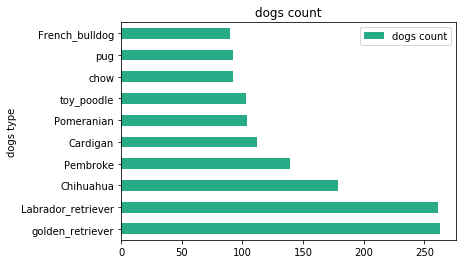

In [90]:
dogs_type ={'dogs type':['golden_retriever','Labrador_retriever','Chihuahua','Pembroke', 'Cardigan',  'Pomeranian', 'toy_poodle', 'chow','pug', 'French_bulldog'],
            'dogs count':[263,261,179,139,112,104,103,92,92,90]}
dataFrame  = pd.DataFrame(data = dogs_type);
dataFrame.plot.barh(x='dogs type', y='dogs count',title='dogs count', color='#29ab87')
plt.show(block=True)


### Does the type of dogs affect the interaction?

In [91]:
twitter_archive_master.dog_stage.value_counts()

pupper     203
doggo      63 
puppo      22 
floofer    7  
Name: dog_stage, dtype: int64

In [92]:
avg_retweet_count_dog_stage = twitter_archive_master.groupby(['dog_stage']).retweet_count.mean().sort_values(ascending=False)

In [93]:
avg_retweet_count_dog_stage.index

Index(['doggo', 'puppo', 'floofer', 'pupper'], dtype='object', name='dog_stage')

In [94]:
avg_favorite_count_dog_stage = twitter_archive_master.groupby(['dog_stage']).favorite_count.mean().sort_values(ascending=False)

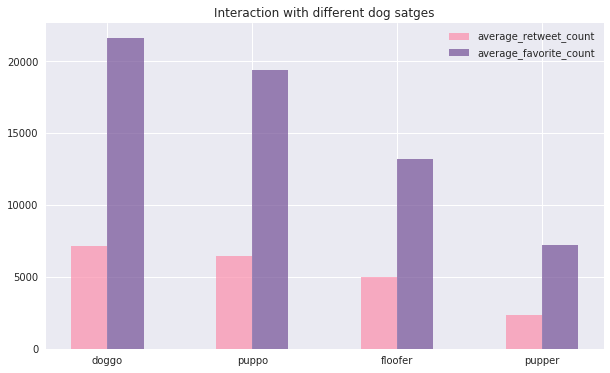

In [95]:
# plot bars
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})

width = 0.25
ind = np.arange(len(avg_favorite_count_dog_stage))

red_bars = plt.bar(ind, avg_retweet_count_dog_stage, width, color='#fc8eac', alpha=.7, label='average_retweet_count')
blue_bars = plt.bar(ind + width, avg_favorite_count_dog_stage, width, color='#734f96', alpha=.7, label='average_favorite_count')

# title and labels
plt.title('Interaction with different dog satges')
locations = ind + width / 2  # xtick locations
labels =['doggo', 'puppo', 'floofer', 'pupper']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()


### Does  dog type affects on favorite counts ?

In [96]:
#make a copy of dataframe
arc_timeseries = twitter_archive_master.copy()
#set the index of the arc_timeseries to be equal to the arc_timeseries["timestamp"] column.
arc_timeseries.index = arc_timeseries['timestamp']

In [97]:
#Drop the original column from the data:
arc_timeseries.drop(columns=['timestamp'], inplace=True)

In [98]:
#Sort the index
arc_timeseries.sort_index(inplace=True)


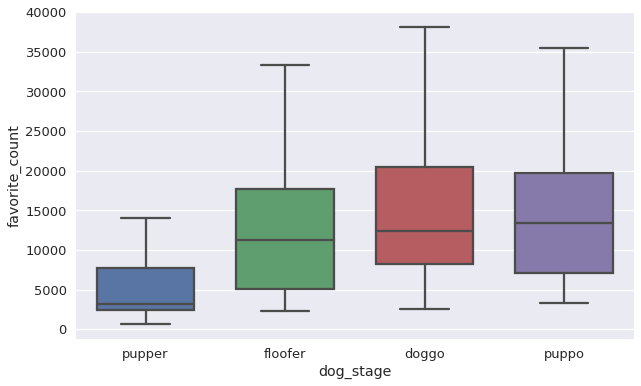

In [99]:
sns.set_context('talk')
ax = sns.boxplot(x= 'dog_stage', y='favorite_count', showfliers=False, width= .70, data = arc_timeseries)
sns.set(rc={'figure.figsize':(8,20)})
plt.savefig("Dog_stage_favorite_count.png")